In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading the Dataset 

In [3]:
# df is the training dataset 
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv') 

# test is the test dataset which will be used for submission
test_submission = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

### Dummy Submission (For Registration)

In [4]:
# X = df.drop('target', axis = 1)
# y = df['target']

In [5]:
# import numpy as np
# from sklearn.dummy import DummyClassifier
# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X, y)
# dummy_clf.predict(X)
# dummy_clf.score(X, y)
# y_pred = dummy_clf.predict(test)
# submission = pd.DataFrame({"id": range(0, test.shape[0]),
#                             "target": y_pred})
# submission.to_csv('submission.csv', index=False)

# Overview of the Dataset and Competition 

### The goal of this competition is to predict a system’s probability of getting infected by various families of malware, based on different properties of that system. The telemetry data containing these properties and the system infections was generated by threat reports collected by system's antivirus software.

***We can clearly observe that few of the columns have only one unique values. Therefore they can be removed as they are not important for the target prediction. Later we will use RFE, PCA, SFS to remove non important features.***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

***Target has two value 0 or 1. This means we have a classification problem in particular Binary Classification. Which models are good at binary classification.***
* Naive Bayes
* Logistic Regression
* K-Nearest Neighbours
* Support Vector Machine
* Decision Tree
* Bagging Decision Tree 
* Boosted Decision Tree 
* Random Forest 
* Voting Classification 

### EDA

In [7]:
# # Since we have very less missing value as compared to the whole dataset so we can safely discard the rows containing the missing value 
# df = df.dropna()

# print('Shape of dataset after removing missing value :',df.shape)

In [8]:
uniqueCols = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=uniqueCols)

In [9]:
numCol = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numCol)
catCol = df.select_dtypes(include='object').columns.tolist()
print(catCol)

['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier', 'target']
['MachineID', 'ProductName', 'EngineVersion', 'Ap

In [10]:
numCol.pop()

'target'

In [11]:
print(numCol)

['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier']


In [12]:
for col in df.columns:
    print('Column Name:', col)
    print(df[col].value_counts())
    print()

Column Name: MachineID
MachineID
8e0523438a5ca48323f50b2c47f6d31a    2
0ca2c7ebe3921b5e74d8a030646ee9c2    2
43628a7db99daf5bf8ca8a3f36058ea4    2
bb11a6869fb4ec76797e97ae3006c833    2
a5f52a788ea2e509572369585ddd05c9    2
                                   ..
f0876e7b384ccc798a875aef1699916f    1
44e0d76ce920cf8a688df7feb6871ff9    1
a7a770ecb9902a3cddf504bd0c5653f5    1
ae184124b12bea48314e33a60e1b0592    1
ad9c385b53f2ca788933a39603b84eda    1
Name: count, Length: 99835, dtype: int64

Column Name: ProductName
ProductName
win8defender    99771
mse               229
Name: count, dtype: int64

Column Name: EngineVersion
EngineVersion
1.1.15200.1    45219
1.1.15100.1    44017
1.1.15000.2     3169
1.1.14901.4     2597
1.1.14800.3     1719
1.1.15300.6      650
1.1.14700.5      593
1.1.14600.4      569
1.1.14104.0      328
1.1.15300.5      255
1.1.13504.0      212
1.1.14500.5      124
1.1.14405.2       82
1.1.14306.0       56
1.1.14202.0       50
1.1.14003.0       34
1.1.13804.0       33
1

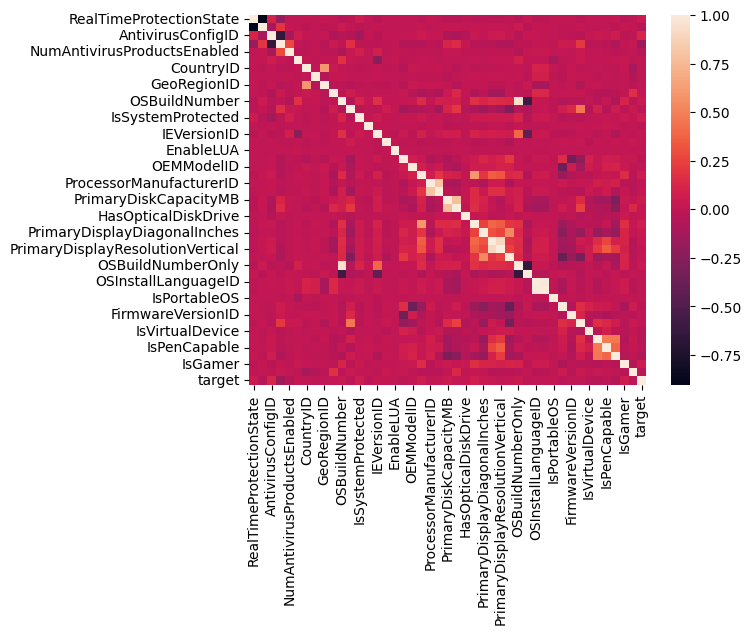

In [13]:
corrMatrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure()
sns.heatmap(corrMatrix)
plt.show()

In [14]:
highPosCorr = []
highNegCorr = []

threshold = 0.75

def correlation(corrMatrix):
    for i in range(len(corrMatrix.columns)):
        for j in range(i+1, len(corrMatrix.columns)):
            if corrMatrix.iloc[i, j] >= threshold:
                highPosCorr.append((corrMatrix.index[i], corrMatrix.index[j]))
            elif corrMatrix.iloc[i, j] <= -threshold:
                highNegCorr.append((corrMatrix.index[i], corrMatrix.index[j]))

correlation(corrMatrix)

print(highPosCorr)
print(highNegCorr)

[('OSBuildNumber', 'OSBuildNumberOnly'), ('ProcessorManufacturerID', 'ProcessorModelID'), ('PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB'), ('PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical'), ('OSInstallLanguageID', 'OSUILocaleID')]
[('RealTimeProtectionState', 'IsPassiveModeEnabled')]


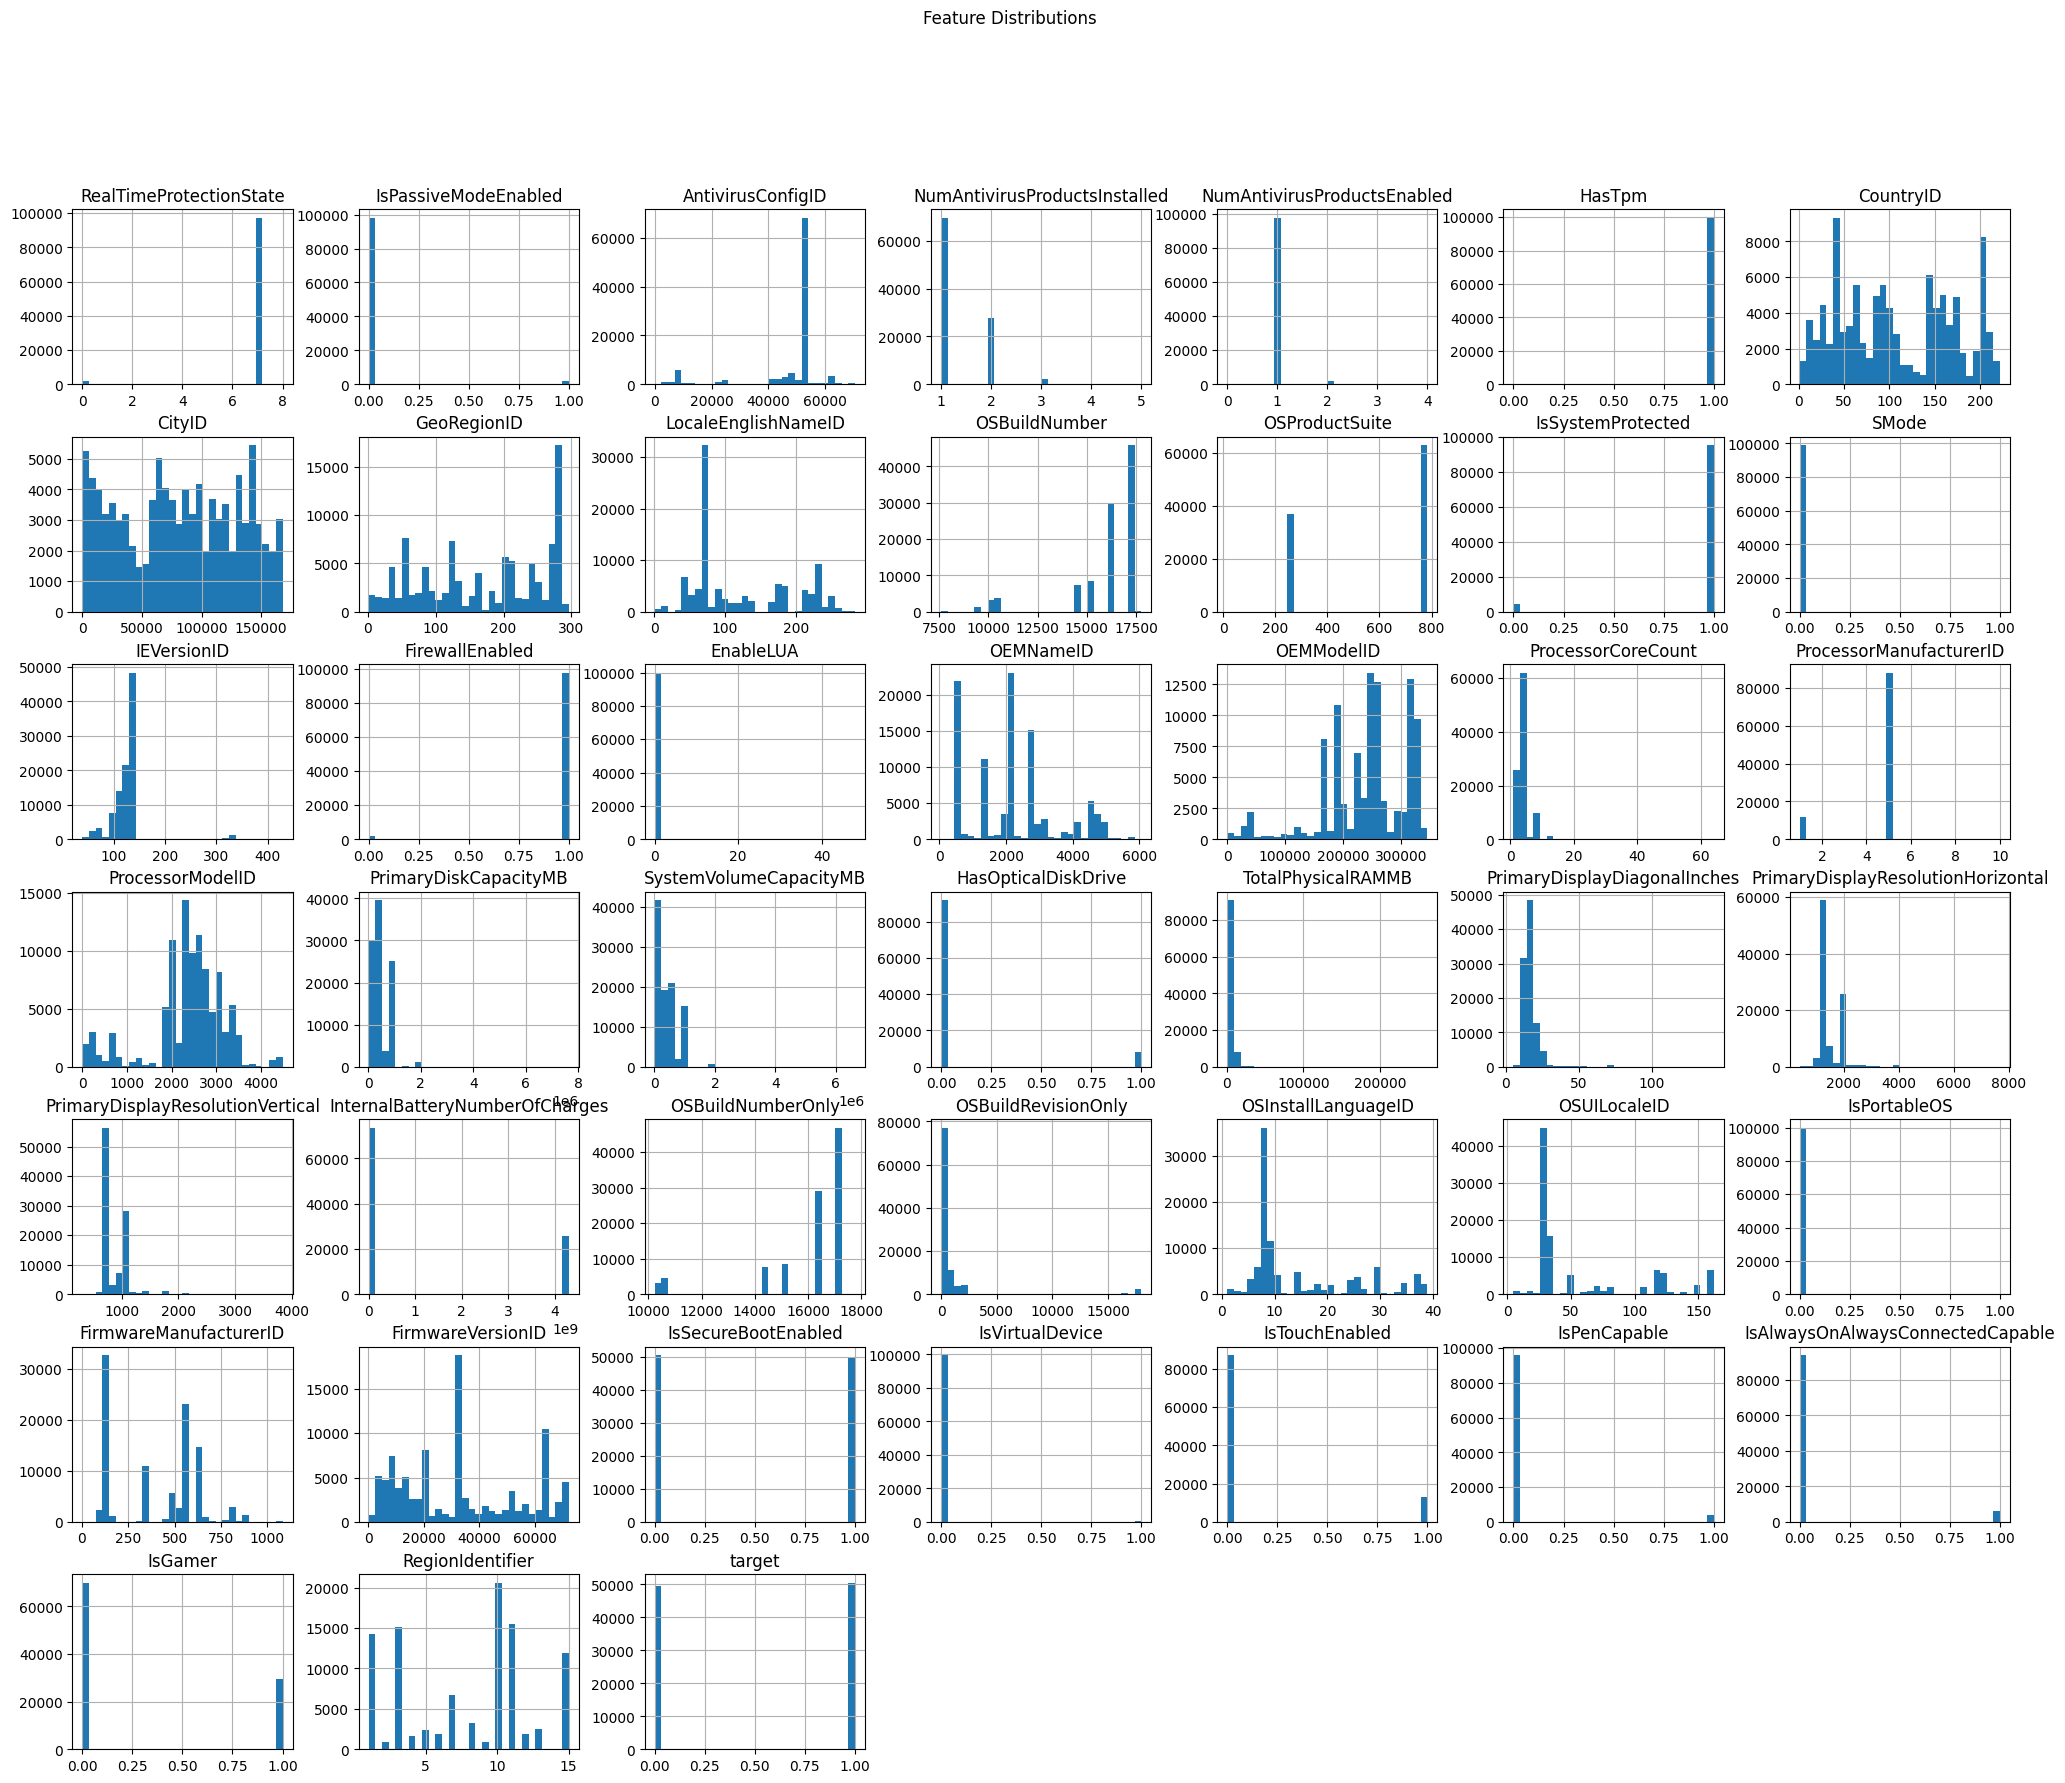

In [15]:
df.hist(figsize=(25, 20), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

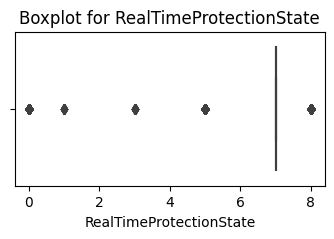

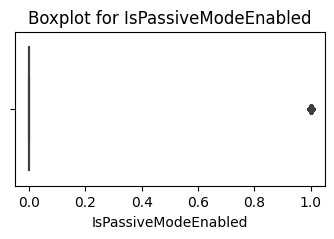

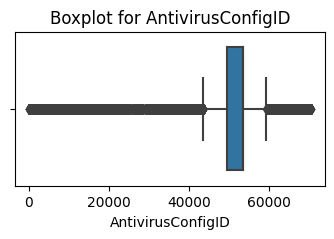

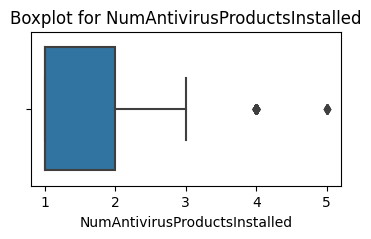

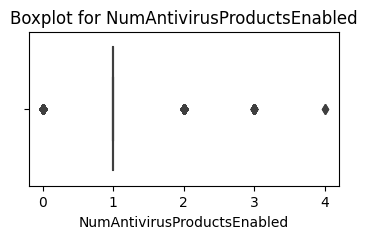

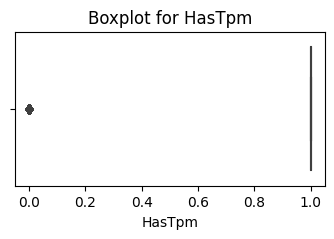

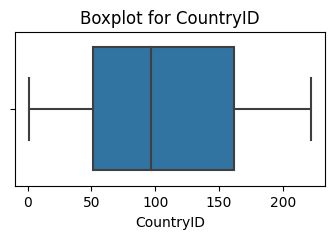

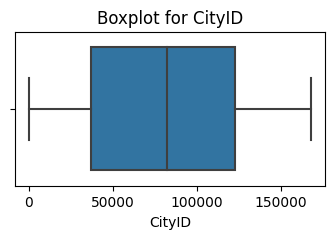

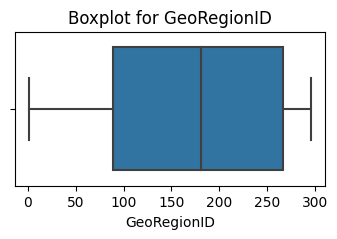

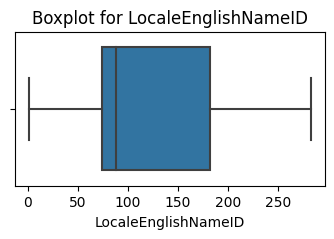

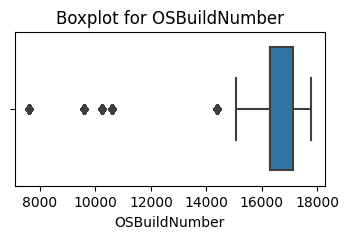

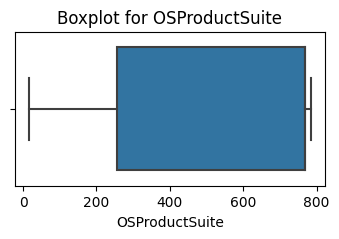

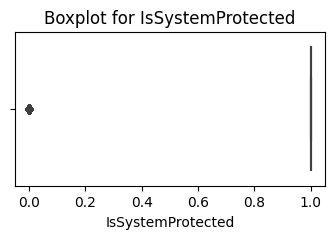

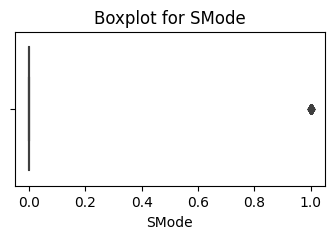

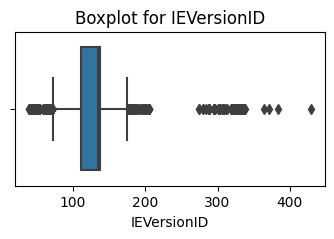

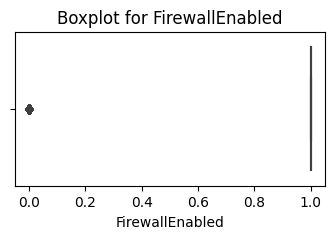

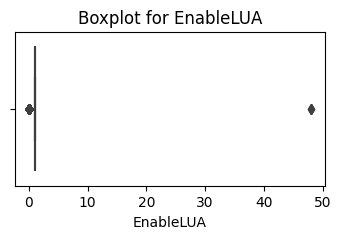

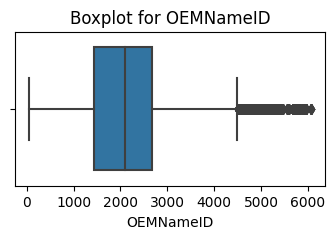

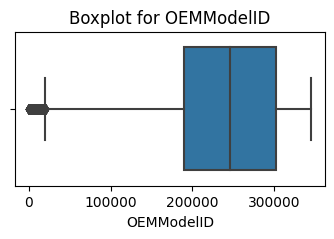

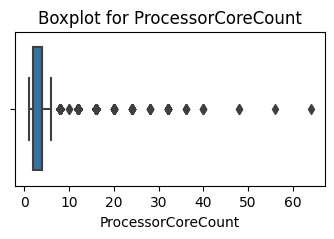

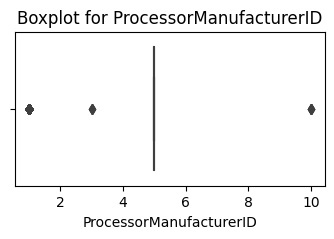

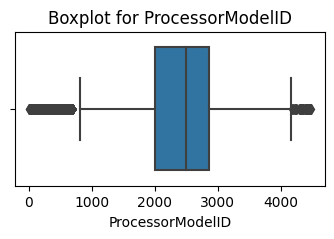

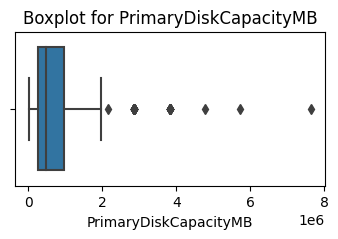

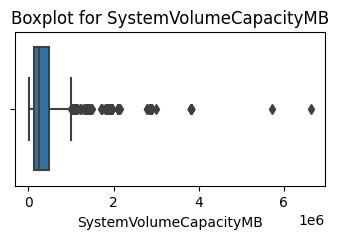

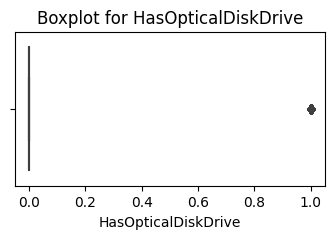

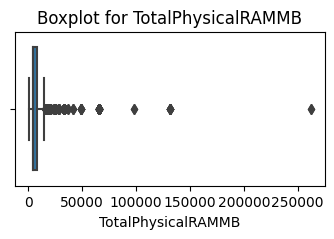

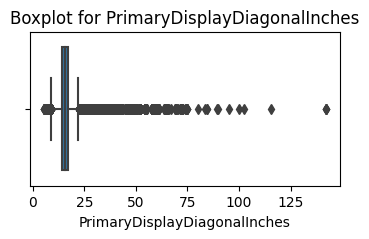

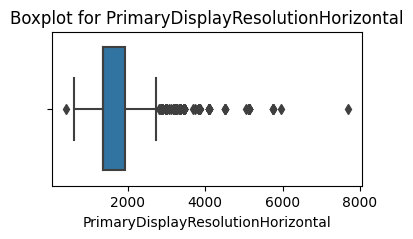

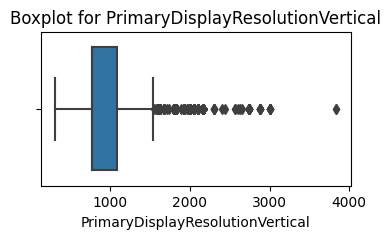

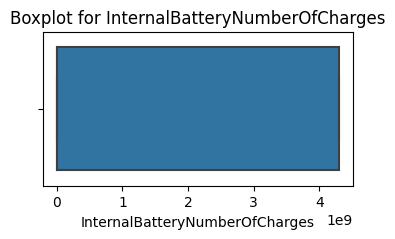

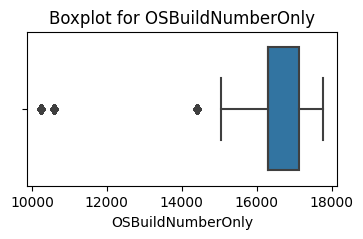

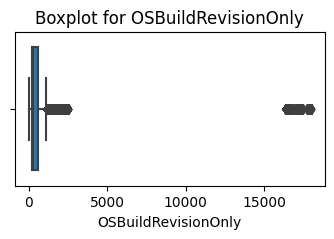

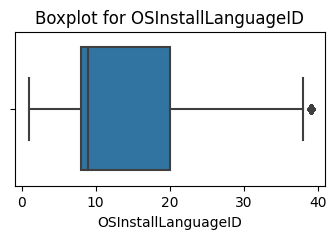

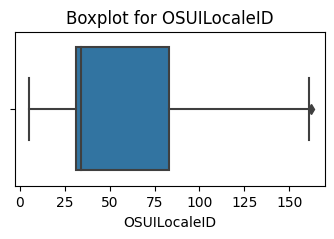

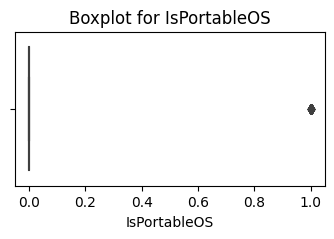

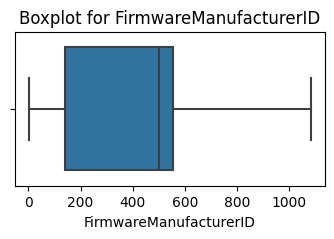

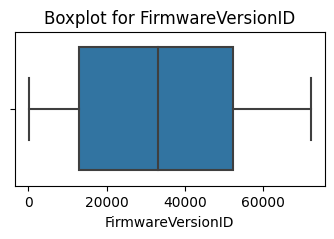

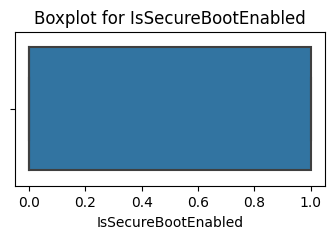

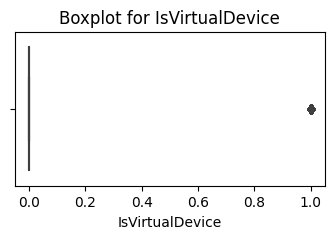

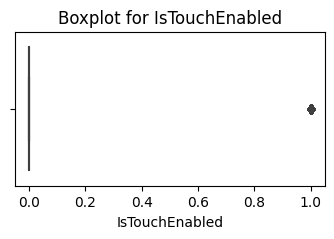

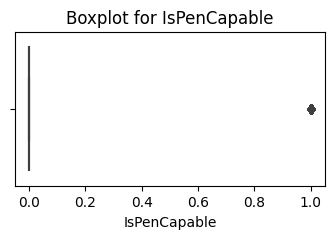

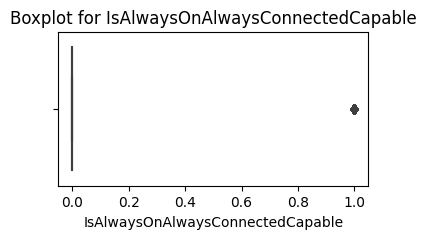

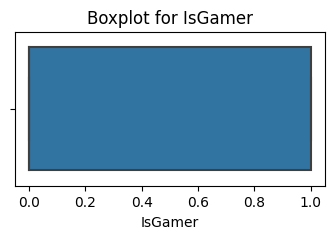

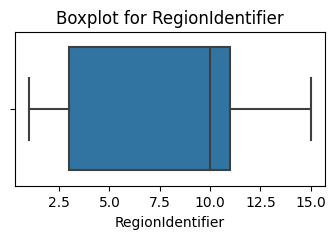

In [16]:
for col in numCol:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


### Preprocessing 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [18]:
X, y = df.drop('target', axis=1), df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(64000, 72)
(16000, 72)
(20000, 72)


### Baseline Model and Simple Pipeline

In [22]:
catPipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

numPipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', catPipe, catCol),
    ('num', numPipe, numCol)
])

lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select='auto')

completePipe = Pipeline([
    ('preprocess', preprocessor),
    ('feature_selection', sfs),
    ('pca', PCA()),
])

X_train_transformed = completePipe.fit_transform(X_train, y_train)
X_val_transformed = completePipe.transform(X_val)
X_test_transformed = completePipe.transform(X_test)

lr.fit(X_train_transformed, y_train)

y_train_pred = (lr.predict(X_train_transformed) > 0.5).astype(int)
y_val_pred = (lr.predict(X_val_transformed) > 0.5).astype(int)
y_test_pred = (lr.predict(X_test_transformed) > 0.5).astype(int)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.59759375
Validation Accuracy: 0.595125
Test Accuracy: 0.595

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56      8031
           1       0.58      0.69      0.63      7969

    accuracy                           0.60     16000
   macro avg       0.60      0.60      0.59     16000
weighted avg       0.60      0.60      0.59     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55      9878
           1       0.59      0.69      0.63     10122

    accuracy                           0.59     20000
   macro avg       0.60      0.59      0.59     20000
weighted avg       0.60      0.59      0.59     20000



**Since we have almost same validation score and test score. There is no overfitting or underfitting.**

# Using Different Model to see which one performs the best 

### Naive Bayes

In [23]:
nb = GaussianNB()
nb.fit(X_train_transformed, y_train)

y_train_pred = nb.predict(X_train_transformed)
y_val_pred = nb.predict(X_val_transformed)
y_test_pred = nb.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.563
Validation Accuracy: 0.557375
Test Accuracy: 0.5576

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.31      0.41      8031
           1       0.54      0.81      0.65      7969

    accuracy                           0.56     16000
   macro avg       0.58      0.56      0.53     16000
weighted avg       0.58      0.56      0.53     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.30      0.40      9878
           1       0.54      0.81      0.65     10122

    accuracy                           0.56     20000
   macro avg       0.57      0.55      0.53     20000
weighted avg       0.57      0.56      0.53     20000



### Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

y_train_pred = lr.predict(X_train_transformed)
y_val_pred = lr.predict(X_val_transformed)
y_test_pred = lr.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.59578125
Validation Accuracy: 0.5925
Test Accuracy: 0.5927

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      8031
           1       0.57      0.70      0.63      7969

    accuracy                           0.59     16000
   macro avg       0.60      0.59      0.59     16000
weighted avg       0.60      0.59      0.59     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      9878
           1       0.58      0.70      0.63     10122

    accuracy                           0.59     20000
   macro avg       0.60      0.59      0.59     20000
weighted avg       0.60      0.59      0.59     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbors

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)

y_train_pred = knn.predict(X_train_transformed)
y_val_pred = knn.predict(X_val_transformed)
y_test_pred = knn.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.71159375
Validation Accuracy: 0.5511875
Test Accuracy: 0.54655

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53      8031
           1       0.54      0.61      0.57      7969

    accuracy                           0.55     16000
   macro avg       0.55      0.55      0.55     16000
weighted avg       0.55      0.55      0.55     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      9878
           1       0.55      0.59      0.57     10122

    accuracy                           0.55     20000
   macro avg       0.55      0.55      0.55     20000
weighted avg       0.55      0.55      0.55     20000



**Looking at the Accuracy, we can definitely conclude that KNN is overfitting**

### Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

y_train_pred = dt.predict(X_train_transformed)
y_val_pred = dt.predict(X_val_transformed)
y_test_pred = dt.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Validation Accuracy: 0.5379375
Test Accuracy: 0.5372

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54      8031
           1       0.54      0.54      0.54      7969

    accuracy                           0.54     16000
   macro avg       0.54      0.54      0.54     16000
weighted avg       0.54      0.54      0.54     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      9878
           1       0.54      0.55      0.55     10122

    accuracy                           0.54     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.54      0.54      0.54     20000



**Decision Tree is also overfitting.**

### Gradient Boosting 

In [27]:
gb = GradientBoostingClassifier()
gb.fit(X_train_transformed, y_train)

y_train_pred = gb.predict(X_train_transformed)
y_val_pred = gb.predict(X_val_transformed)
y_test_pred = gb.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))



Training Accuracy: 0.625
Validation Accuracy: 0.6105
Test Accuracy: 0.61505

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      8031
           1       0.60      0.68      0.64      7969

    accuracy                           0.61     16000
   macro avg       0.61      0.61      0.61     16000
weighted avg       0.61      0.61      0.61     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      9878
           1       0.61      0.68      0.64     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.61      0.61     20000
weighted avg       0.62      0.62      0.61     20000



### Bagging Classifier with Random Froest

In [28]:
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)
bagging.fit(X_train_transformed, y_train)

y_train_pred = bagging.predict(X_train_transformed)
y_val_pred = bagging.predict(X_val_transformed)
y_test_pred = bagging.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy: 0.998734375
Validation Accuracy: 0.616375
Test Accuracy: 0.61545

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60      8031
           1       0.61      0.65      0.63      7969

    accuracy                           0.62     16000
   macro avg       0.62      0.62      0.62     16000
weighted avg       0.62      0.62      0.62     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      9878
           1       0.61      0.65      0.63     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.61     20000
weighted avg       0.62      0.62      0.61     20000



### Adaboost with Random Forest

In [29]:
boosting = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)
boosting.fit(X_train_transformed, y_train)

y_train_pred = boosting.predict(X_train_transformed)
y_val_pred = boosting.predict(X_val_transformed)
y_test_pred = boosting.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy: 1.0
Validation Accuracy: 0.6079375
Test Accuracy: 0.6032

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      8031
           1       0.60      0.62      0.61      7969

    accuracy                           0.61     16000
   macro avg       0.61      0.61      0.61     16000
weighted avg       0.61      0.61      0.61     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      9878
           1       0.61      0.61      0.61     10122

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



**Overfitting**

In [30]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_transformed, y_train)

y_train_pred = rf.predict(X_train_transformed)
y_val_pred = rf.predict(X_val_transformed)
y_test_pred = rf.predict(X_test_transformed)

train = accuracy_score(y_train, y_train_pred)
val = accuracy_score(y_val, y_val_pred)
test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train}")
print(f"Validation Accuracy: {val}")
print(f"Test Accuracy: {test}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Validation Accuracy: 0.6059375
Test Accuracy: 0.60215

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      8031
           1       0.60      0.61      0.61      7969

    accuracy                           0.61     16000
   macro avg       0.61      0.61      0.61     16000
weighted avg       0.61      0.61      0.61     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      9878
           1       0.61      0.61      0.61     10122

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



**Overfitting but still the highest accuracy so far.**

**Generating the Submission File**

In [31]:
test_submission = test_submission.drop(columns=uniqueCols)

In [32]:
Y = completePipe.transform(test_submission)

y_pred_test = gb.predict(Y)

submission = pd.DataFrame({"id": test_submission.index, "target": y_pred_test})
submission.to_csv('submission.csv', index=False)